In [1]:
import torch
import numpy as np
import pandas as pd
import os
import math
from IPython import display
from d2l import torch as d2l


## Tensor Operations

In [2]:
x = torch.arange(12)


In [3]:
x


tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [4]:
x.shape


torch.Size([12])

In [5]:
x.numel()


12

In [6]:
X = x.reshape(3, 4)
X


tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [7]:
X.shape

torch.Size([3, 4])

In [8]:
X = x.reshape(3, -1)

In [9]:
X.shape

torch.Size([3, 4])

In [10]:
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [11]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [12]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [13]:
torch.randn(3, 4)

tensor([[-1.2057,  1.1401,  0.7426,  0.2247],
        [-0.4360,  1.0197, -1.3105, -1.5998],
        [-0.9916, -0.2197,  0.4365, -0.5765]])

In [14]:
torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [15]:
torch.arange(5) + torch.arange(5)

tensor([0, 2, 4, 6, 8])

In [16]:
torch.exp(x)

tensor([1.0000e+00, 2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01, 1.4841e+02,
        4.0343e+02, 1.0966e+03, 2.9810e+03, 8.1031e+03, 2.2026e+04, 5.9874e+04])

In [17]:
X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

In [18]:
torch.cat((X, Y), dim=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])

In [19]:
torch.cat((X, Y), dim = 1)

tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])

In [20]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [21]:
X > Y

tensor([[False, False, False, False],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]])

In [22]:
X < Y

tensor([[ True, False,  True, False],
        [False, False, False, False],
        [False, False, False, False]])

In [23]:
X.sum()

tensor(66.)

In [24]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))

In [25]:
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [26]:
(a + b).shape

torch.Size([3, 2])

In [27]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [28]:
X[-1]

tensor([ 8.,  9., 10., 11.])

In [29]:
X[-1][3]

tensor(11.)

In [30]:
X[1:3]

tensor([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [31]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [32]:
X[1][2] = 600.2

In [33]:
X

tensor([[  0.0000,   1.0000,   2.0000,   3.0000],
        [  4.0000,   5.0000, 600.2000,   7.0000],
        [  8.0000,   9.0000,  10.0000,  11.0000]])

In [34]:
X[0:2, :] = 500

In [35]:
X

tensor([[500., 500., 500., 500.],
        [500., 500., 500., 500.],
        [  8.,   9.,  10.,  11.]])

In [36]:
X[0:3, 0:4] = 0

In [37]:
X

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [38]:
Y

tensor([[2., 1., 4., 3.],
        [1., 2., 3., 4.],
        [4., 3., 2., 1.]])

In [39]:
before = id(Y)
Y = Y + X
before == id(Y)

False

In [40]:
before = id(Y)
Y[:] = Y + X
before == id(Y)

True

In [41]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y       # used the same object memory (in-place update)
print('id(Z):', id(Z))

id(Z): 140605152540864
id(Z): 140605152540864


In [42]:
A = np.array([1, 2, 3])
B = torch.tensor(A)
A, B

(array([1, 2, 3]), tensor([1, 2, 3]))

In [43]:
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [44]:
a = torch.tensor([3.5])
a

tensor([3.5000])

In [45]:
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## Reading Data into tensor

In [46]:
os.makedirs(os.path.join('.', 'data'), exist_ok=True)
data_file = os.path.join('.', 'data', 'house_tiny.csv')

In [47]:
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n') # Column names
    f.write('NA,Pave,127500\n') # Each row represents a data example
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [48]:
data = pd.read_csv('data/house_tiny.csv')
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


In [49]:
inputs = data.iloc[:, :2]
output = data.iloc[:, 2]

In [50]:
inputs = inputs.fillna(inputs.mean())  # filling with mean value
inputs

,NumRooms,Alley
0,3.0,Pave
1,2.0,NaN
2,4.0,NaN
3,3.0,NaN


In [51]:
inputs = pd.get_dummies(inputs, dummy_na=True)
inputs

,NumRooms,Alley_Pave,Alley_nan
0,3.0,1,0
1,2.0,0,1
2,4.0,0,1
3,3.0,0,1


In [52]:
X = torch.tensor(inputs.values)
y = torch.tensor(output.values)

In [53]:
X, X.shape

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 torch.Size([4, 3]))

In [54]:
y, y.shape

(tensor([127500, 106000, 178100, 140000]), torch.Size([4]))

In [55]:
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


In [56]:
col_most_nan = data.isnull().sum().sort_values(ascending=False).index[0]

In [57]:
col_most_nan

'Alley'

In [58]:
inputs_rem_most_null = data.drop(labels=col_most_nan, axis=1)

In [59]:
inputs_rem_most_null

,NumRooms,Price
0,NaN,127500
1,2.0,106000
2,4.0,178100
3,NaN,140000


## Linear Algebra on Tensors

#### Scalars

In [60]:
x = torch.tensor(3.0)
y = torch.tensor(4.0)

In [61]:
x, y

(tensor(3.), tensor(4.))

In [62]:
x + y, x * y

(tensor(7.), tensor(12.))

#### Vectors

In [63]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

In [64]:
x[3]

tensor(3)

In [65]:
len(x)

4

In [66]:
x.shape

torch.Size([4])

#### Matrices

In [67]:
X = torch.arange(20).reshape(5, 4)

In [68]:
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [69]:
X.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [70]:
A = torch.arange(9).reshape(3, 3)

In [71]:
A

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [72]:
A == A.T

tensor([[ True, False, False],
        [False,  True, False],
        [False, False,  True]])

In [73]:
B = torch.tensor([[1,2,3], [2, 0 , 4], [3, 4, 5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [74]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

#### Tensors

In [75]:
X = torch.arange(24).reshape(2, 3, 4)

In [76]:
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [77]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [78]:
B = A.clone()

In [79]:
A + B

tensor([[ 0.,  2.,  4.,  6.],
        [ 8., 10., 12., 14.],
        [16., 18., 20., 22.],
        [24., 26., 28., 30.],
        [32., 34., 36., 38.]])

In [80]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [81]:
#### reduction operations

In [82]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [83]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [84]:
A.sum(axis=0)

tensor([40., 45., 50., 55.])

In [85]:
A.sum(axis=1)

tensor([ 6., 22., 38., 54., 70.])

In [86]:
A.sum()

tensor(190.)

In [87]:
A.sum(axis=[0, 1])   # same as summing up all elements

tensor(190.)

In [88]:
A.mean()

tensor(9.5000)

In [89]:
A.sum() / A.numel()

tensor(9.5000)

In [90]:
A.mean(axis=1)

tensor([ 1.5000,  5.5000,  9.5000, 13.5000, 17.5000])

In [91]:
A.mean(axis=0)

tensor([ 8.,  9., 10., 11.])

In [92]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

#### Non reduction operations

In [93]:
A.sum(axis=1, keepdims=True)

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [94]:
A.sum(axis=1)

tensor([ 6., 22., 38., 54., 70.])

In [95]:
A / A.sum()   # scalar operations

tensor([[0.0000, 0.0053, 0.0105, 0.0158],
        [0.0211, 0.0263, 0.0316, 0.0368],
        [0.0421, 0.0474, 0.0526, 0.0579],
        [0.0632, 0.0684, 0.0737, 0.0789],
        [0.0842, 0.0895, 0.0947, 0.1000]])

In [96]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [97]:
 A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

In [98]:
A.cumsum(axis=1)

tensor([[ 0.,  1.,  3.,  6.],
        [ 4.,  9., 15., 22.],
        [ 8., 17., 27., 38.],
        [12., 25., 39., 54.],
        [16., 33., 51., 70.]])

### Dot products

In [99]:
y = torch.ones(4, dtype=torch.float32)
x,y

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]))

In [100]:
x.shape, y.shape

(torch.Size([4]), torch.Size([4]))

In [101]:
torch.sum(torch.dot(x, y))

tensor(6.)

In [102]:
torch.sum(x * y)

tensor(6.)

In [103]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [104]:
A.shape, x.shape, torch.mv(A,x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

In [105]:
A.shape

torch.Size([5, 4])

In [106]:
B = torch.ones(4, 3)

In [107]:
A.shape, B.shape, torch.mm(A, B).shape

(torch.Size([5, 4]), torch.Size([4, 3]), torch.Size([5, 3]))

#### Norm of vector

In [108]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)   # L2 norm

tensor(5.)

In [109]:
torch.abs(u).sum()   # L1 , norm

tensor(7.)

In [110]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [111]:
B = torch.arange(20).reshape(5, 4)

In [112]:
C = A + B 

In [113]:
A.T + B.T == C.T

tensor([[True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True]])

In [114]:
A = torch.arange(9).reshape(3, 3)

In [115]:
A

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [116]:
C = A + A.T

In [117]:
C

tensor([[ 0,  4,  8],
        [ 4,  8, 12],
        [ 8, 12, 16]])

In [118]:
x = torch.arange(24).reshape(2,3,4)

In [119]:
x

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [120]:
len(x)

2

In [121]:
x.size()

torch.Size([2, 3, 4])

In [122]:
x.numel()

24

In [123]:
A

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [124]:
A.sum()

tensor(36)

In [125]:
A.sum(axis=1)

tensor([ 3, 12, 21])

In [126]:
A / A.sum(axis=1)

tensor([[0.0000, 0.0833, 0.0952],
        [1.0000, 0.3333, 0.2381],
        [2.0000, 0.5833, 0.3810]])

In [127]:
x.shape

torch.Size([2, 3, 4])

In [128]:
x

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [129]:
x.sum(axis=0)

tensor([[12, 14, 16, 18],
        [20, 22, 24, 26],
        [28, 30, 32, 34]])

In [130]:
x[0] + x[1]

tensor([[12, 14, 16, 18],
        [20, 22, 24, 26],
        [28, 30, 32, 34]])

In [131]:
x.sum(axis=1)

tensor([[12, 15, 18, 21],
        [48, 51, 54, 57]])

In [132]:
x.sum(axis=2)

tensor([[ 6, 22, 38],
        [54, 70, 86]])

### Calculus

In [133]:
def f(x):
    return 3 * x ** 2 - 4 * x


In [134]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h


In [135]:
h = 0.1
# derivative at x = 1
x = 1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, x, h):.5f}')
    h *= 0.1


h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [136]:
h = 0.1
# derivative at x = 2
x = 2
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, x, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=8.30000
h=0.01000, numerical limit=8.03000
h=0.00100, numerical limit=8.00300
h=0.00010, numerical limit=8.00030
h=0.00001, numerical limit=8.00003


In [137]:
def use_svg_display(): #@save
    """Use the svg format to display a plot in Jupyter."""
    display.set_matplotlib_formats('svg')
    

In [138]:
def set_figsize(figsize=(3.5, 2.5)): #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize
    

In [139]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()


In [140]:
#@save
def plot(X, Y=None,
            xlabel=None, ylabel=None,legend=None, 
            xlim=None, ylim=None,
            xscale='linear', yscale='linear',
            fmts=('-', 'm--', 'g-.', 'r:'),
            figsize=(3.5, 2.5),
            axes=None):

    """Plot data points."""
    if legend is None:
        legend = []
    
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()
    
    # Return True if `X` (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or
            isinstance(X, list) and not hasattr(X[0], "__len__"))
    
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)


<ipython-input-137-4007c1e1b97d>:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


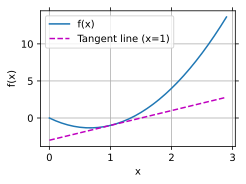

In [141]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])


### Plotting tangent for x^3 - 1/x

In [142]:
def f(x):
    return (x ** 3) -  (1 / x)

#### derivate of x^3 - 1/x => 3x^2 + (1 / x^2)

In [143]:
def f_der(x):
    return (3 * (x ** 2)) + (1 / (x ** 2))

<ipython-input-142-4b601cfb9b2f>:2: RuntimeWarning: divide by zero encountered in true_divide
  return (x ** 3) -  (1 / x)
<ipython-input-137-4007c1e1b97d>:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


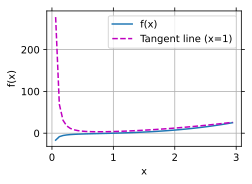

In [144]:
x = np.arange(0, 3, 0.06)
plot(x, [f(x), f_der(x)],
     xlabel='x', ylabel='f(x)', 
     legend=['f(x)', 'Tangent line (x=1)'])


### Differentiation, Gradients using tensor flow API

In [145]:
x = torch.arange(4.0)

In [146]:
x

tensor([0., 1., 2., 3.])

In [147]:
x.requires_grad_(True)  # store gradients on same memory

tensor([0., 1., 2., 3.], requires_grad=True)

In [148]:
print(x.grad)   # first time, it will be none until backward is called.

None


In [149]:
y = 2 * torch.dot(x, x)

In [150]:
y

tensor(28., grad_fn=<MulBackward0>)

In [151]:
y.backward()

In [152]:
x.grad

tensor([ 0.,  4.,  8., 12.])

In [153]:
x.grad == 4 * x

tensor([True, True, True, True])

In [154]:
x.grad.zero_()   # reset the gradient value

tensor([0., 0., 0., 0.])

In [155]:
y = x.sum()

In [156]:
print(y)

tensor(6., grad_fn=<SumBackward0>)


In [157]:
y.backward()

In [158]:
x.grad

tensor([1., 1., 1., 1.])

### Probability

In [159]:
from torch.distributions import multinomial

In [160]:
fair_probs = torch.ones([6]) / 6

In [161]:
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 1., 0., 0.])

In [162]:
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 1., 0., 0.])

In [163]:
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 1., 0., 0., 0., 0.])

In [164]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([2., 1., 1., 1., 2., 3.])

In [165]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1560, 0.1710, 0.1690, 0.1750, 0.1560, 0.1730])

In [166]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))

In [167]:
counts[:6], counts.shape

(tensor([[0., 1., 2., 5., 2., 0.],
         [1., 2., 2., 1., 3., 1.],
         [1., 1., 1., 4., 1., 2.],
         [3., 2., 1., 0., 1., 3.],
         [4., 2., 0., 1., 1., 2.],
         [2., 2., 4., 1., 0., 1.]]),
 torch.Size([500, 6]))

In [168]:
cum_counts = counts.cumsum(dim=0)

In [169]:
cum_counts[:6], cum_counts.shape

(tensor([[ 0.,  1.,  2.,  5.,  2.,  0.],
         [ 1.,  3.,  4.,  6.,  5.,  1.],
         [ 2.,  4.,  5., 10.,  6.,  3.],
         [ 5.,  6.,  6., 10.,  7.,  6.],
         [ 9.,  8.,  6., 11.,  8.,  8.],
         [11., 10., 10., 12.,  8.,  9.]]),
 torch.Size([500, 6]))

In [170]:
cum_counts[-5:], cum_counts.shape

(tensor([[797., 850., 815., 833., 868., 797.],
         [798., 854., 817., 834., 870., 797.],
         [800., 855., 818., 834., 874., 799.],
         [803., 857., 819., 837., 874., 800.],
         [804., 859., 820., 838., 876., 803.]]),
 torch.Size([500, 6]))

In [171]:
cum_counts.sum(dim=1, keepdims=True).shape

torch.Size([500, 1])

In [172]:
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

In [173]:
estimates, estimates.shape

(tensor([[0.0000, 0.1000, 0.2000, 0.5000, 0.2000, 0.0000],
         [0.0500, 0.1500, 0.2000, 0.3000, 0.2500, 0.0500],
         [0.0667, 0.1333, 0.1667, 0.3333, 0.2000, 0.1000],
         ...,
         [0.1606, 0.1717, 0.1643, 0.1675, 0.1755, 0.1604],
         [0.1609, 0.1717, 0.1641, 0.1677, 0.1752, 0.1603],
         [0.1608, 0.1718, 0.1640, 0.1676, 0.1752, 0.1606]]),
 torch.Size([500, 6]))

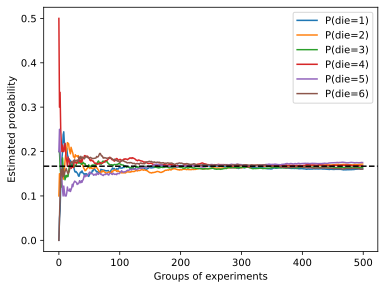

In [174]:
d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

#### plotting normal distributions with given mean and std

In [175]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

In [176]:
x = np.arange(-7, 7, 0.01)

In [177]:
# Mean and standard deviation pairs
params = [(0, 1), (0, 2), (3, 1)]

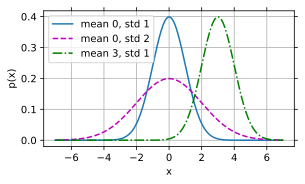

In [178]:
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params],
         xlabel='x', ylabel='p(x)',
         figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])